In [1]:
import numpy as np
import random

# Define the gridworld environment
class GridWorld:
    def __init__(self):
        self.grid = np.array([
            [0, 0, 0, 1],  # Goal at (0, 3)
            [0, -1, 0, 0],  # Wall with reward -1
            [0, 0, 0, 0],
            [0, 0, 0, 0]  # Start at (3, 0)
        ])
        self.start_state = (3, 0)
        self.state = self.start_state

    def reset(self):
        self.state = self.start_state
        return self.state

    def is_terminal(self, state):
        return self.grid[state] == 1 or self.grid[state] == -1

    def get_next_state(self, state, action):
        next_state = list(state)
        if action == 0:  # Move up
            next_state[0] = max(0, state[0] - 1)
        elif action == 1:  # Move right
            next_state[1] = min(3, state[1] + 1)
        elif action == 2:  # Move down
            next_state[0] = min(3, state[0] + 1)
        elif action == 3:  # Move left
            next_state[1] = max(0, state[1] - 1)
        return tuple(next_state)

    def step(self, action):
        next_state = self.get_next_state(self.state, action)
        reward = self.grid[next_state]
        self.state = next_state
        done = self.is_terminal(next_state)
        return next_state, reward, done
# The environment is simple. The agent moves up, down, left, or right, and receives rewards based on its location.

# Q-Learning Agent

# Next, we define the Q-learning agent that interacts with the environment.

class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1):
        self.q_table = np.zeros((4, 4, 4))  # Q-values for each state-action pair
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate

    def choose_action(self, state):
        if random.uniform(0, 1) < self.exploration_rate:
            return random.randint(0, 3)  # Explore
        else:
            return np.argmax(self.q_table[state])  # Exploit

    def update_q_value(self, state, action, reward, next_state):
        max_future_q = np.max(self.q_table[next_state])  # Best Q-value for next state
        current_q = self.q_table[state][action]
        # Q-learning formula
        self.q_table[state][action] = current_q + self.learning_rate * (
            reward + self.discount_factor * max_future_q - current_q
        )
# - The agent has a Q-table initialized to zero.
# - The agent uses an epsilon-greedy strategy, meaning it randomly explores with probability epsilon and exploits the current knowledge otherwise.
# - The update_q_value function uses the Q-learning update formula to adjust the Q-values after each step.

# Training the Agent

# Finally, we train the agent by running episodes in the environment.

env = GridWorld()
agent = QLearningAgent()

episodes = 1000  # Number of training episodes

for episode in range(episodes):
    state = env.reset()  # Reset the environment at the start of each episode
    done = False

    while not done:
        action = agent.choose_action(state)  # Choose an action
        next_state, reward, done = env.step(action)  # Take the action and observe next state, reward
        agent.update_q_value(state, action, reward, next_state)  # Update Q-values
        state = next_state  # Move to the next state

In [2]:
# After the training loop:
print(agent.q_table)

[[[ 0.68234979  0.81        0.57633331  0.70114041]
  [ 0.7848492   0.9        -0.91137062  0.64451875]
  [ 0.87739536  1.          0.71825837  0.72748863]
  [ 0.          0.          0.          0.        ]]

 [[ 0.729      -0.81469798  0.55483564  0.56737097]
  [ 0.          0.          0.          0.        ]
  [ 0.89973186  0.09634311  0.24042958 -0.1       ]
  [ 0.56953279  0.          0.          0.        ]]

 [[ 0.6561      0.48639542  0.45350562  0.51648626]
  [-0.19        0.7022876   0.          0.05904393]
  [ 0.80445515  0.00805553  0.00909886  0.        ]
  [ 0.10053559  0.          0.          0.        ]]

 [[ 0.59049     0.30033377  0.44639067  0.45963855]
  [ 0.50813934  0.          0.00637561  0.        ]
  [ 0.1461222   0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]]]


In [3]:
pip install matplotlib

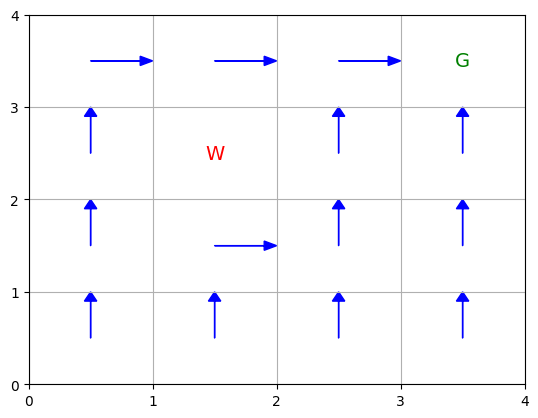

In [4]:
import matplotlib.pyplot as plt

def visualize_policy(q_table):
    """Visualizes the policy learned by the Q-learning agent."""
    grid_size = q_table.shape[0]  # Assuming a square grid
    fig, ax = plt.subplots()
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_xticks(np.arange(0, grid_size + 1, 1))
    ax.set_yticks(np.arange(0, grid_size + 1, 1))
    ax.grid(True)

    for i in range(grid_size):
        for j in range(grid_size):
            state = (i, j)
            if env.is_terminal(state):  # Check if terminal state
                if env.grid[state] == 1:  # Goal
                    ax.text(j + 0.5, grid_size - i - 0.5, 'G', ha='center', va='center', fontsize=14, color='green')
                else:  # Wall
                    ax.text(j + 0.5, grid_size - i - 0.5, 'W', ha='center', va='center', fontsize=14, color='red')
                continue  # Skip to next state

            action = np.argmax(q_table[state])  # Get optimal action
            if action == 0:  # Up
                dx, dy = 0, 0.4
            elif action == 1:  # Right
                dx, dy = 0.4, 0
            elif action == 2:  # Down
                dx, dy = 0, -0.4
            else:  # Left
                dx, dy = -0.4, 0

            ax.arrow(j + 0.5, grid_size - i - 0.5, dx, dy, head_width=0.1, head_length=0.1, fc='blue', ec='blue')

    plt.show()

# Call the function to visualize the policy
visualize_policy(agent.q_table)